In [1]:
#import packages
#%pip install seaborn
#%pip install openpyxl
#%pip install ipympl
#%pip install scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import math
import datetime as dt 
%matplotlib inline
import scienceplots
#%matplotlib widget

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18196\104618470.py:7: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
plt.style.use(['science','notebook','grid'])

In [3]:
np.__version__
pd.__version__

'2.2.0'

In [4]:
count=pd.read_excel(r"C:\Users\Lenovo\Desktop\Research(IGE)\Meteo\Mera\Mera_High_Camp\Final_Data\Mera5770final2017_22.xlsx",skiprows=2)
khare_ppt=pd.read_csv(r"C:\Users\Lenovo\Desktop\Data_Final\Khare_hourly_final.csv")
SWE=pd.read_csv(r"C:\Users\Lenovo\Desktop\Data_Final\Code\Snow_Fox\Daily_file.csv")


In [5]:
count=count.iloc[2:,]
count=count.rename(columns={'Date / Hour':'Date','u ':'wind','LWin cor':'LWin','LWout cor':'LWout'})
count["Date"]=pd.to_datetime(count["Date"])


In [6]:
count.tail()

,Date,Tair,RH,wind,Direction,SWin,SWout,LWin,LWout,Abl/Acc,Patm
84012,2022-08-26 17:00:00,1.609,87.6,0.027,271.7,184.46,105.29,312.25,NaN,NaN,532.1
84013,2022-08-26 17:30:00,1.071,90.6,0.165,271.8,217.74,128.69,315.56,NaN,NaN,532
84014,2022-08-26 18:00:00,0.545,94.6,0.057,271.5,57.238,38.724,309.77,NaN,NaN,532.3
84015,2022-08-26 18:30:00,0.156,95.3,0.046,271.6,8.6588,7.2508,307.23,NaN,NaN,532.3
84016,2022-08-26 19:00:00,-0.145,97.6,0.013,271.6,0,0,306.11,NaN,NaN,532.7


In [7]:
khare_ppt.tail()

,Datetime,Precipitation
52579,11/30/2022 20:00,0.0
52580,11/30/2022 21:00,0.0
52581,11/30/2022 22:00,0.0
52582,11/30/2022 23:00,0.0
52583,12/1/2022 0:00,0.0


In [8]:
khare_ppt.rename(columns={'Datetime':'Date'},inplace=True)


In [9]:
khare_ppt.dtypes
khare_ppt["Date"]=pd.to_datetime(khare_ppt["Date"])

In [10]:
khare_ppt.head()


,Date,Precipitation
0,2016-12-01 01:00:00,0.0
1,2016-12-01 02:00:00,0.0
2,2016-12-01 03:00:00,0.0
3,2016-12-01 04:00:00,0.0
4,2016-12-01 05:00:00,0.0


In [11]:
SWE["Date"]=pd.to_datetime(SWE["Date"])
SWE.set_index("Date",inplace=True)

In [12]:
for col in SWE.columns:
    if SWE[col].dtype== "object":
        SWE[col]=pd.to_numeric(SWE[col],errors="coerce")


In [13]:
SWE.dtypes

raw_count               float64
temp                    float64
pressure                float64
solar_cor               float64
pressure_cor            float64
corrected_count         float64
one_day_moving_count    float64
relative_count          float64
mass_attenuation        float64
SWE                     float64
dtype: object

In [14]:
SWE.isna().sum()

raw_count               498
temp                      0
pressure                  0
solar_cor                 0
pressure_cor              0
corrected_count         498
one_day_moving_count    521
relative_count          521
mass_attenuation        521
SWE                     521
dtype: int64

In [15]:

SWE.tail()

,raw_count,temp,pressure,solar_cor,pressure_cor,corrected_count,one_day_moving_count,relative_count,mass_attenuation,SWE
Date,,,,,,,,,,
2021-09-16 05:00:00,26.865,266.808875,532.550441,0.986,1.007013,26.674657,27.263276,0.175892,0.013652,127.297275
2021-09-16 06:00:00,26.265,267.483875,532.750440,0.986,1.008495,26.117287,27.401008,0.176781,0.013707,126.421271
2021-09-16 07:00:00,28.415,267.500875,533.150440,0.986,1.011466,28.338422,27.263276,0.175892,0.013652,127.297275
2021-09-16 08:00:00,26.700,267.775375,533.200440,0.985,1.011837,26.610819,27.125543,0.175004,0.013598,128.177070
2021-09-16 09:00:00,26.530,269.865875,533.500436,0.986,1.014072,26.526681,27.037833,0.174438,0.013564,128.739313


In [16]:
SWE.rename(columns={"SWE":"SWE_cum"},inplace=True)


In [17]:
SWE["SWE_hourly"]=SWE["SWE_cum"].diff(periods=1)


In [18]:
SWE["SWE_hourly"].iloc[0]=0

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18196\3946447797.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  SWE["SWE_hourly"].iloc[0]=0


In [19]:
SWE

,raw_count,temp,pressure,solar_cor,pressure_cor,corrected_count,one_day_moving_count,relative_count,mass_attenuation,SWE_cum,SWE_hourly
Date,,,,,,,,,,,
2019-11-13 02:00:00,130.550,266.485375,533.000441,0.986,1.010351,130.054648,130.226897,0.840174,0.071276,2.443270,0.000000
2019-11-13 03:00:00,131.000,266.477875,532.900441,0.987,1.009608,130.539277,130.182000,0.839884,0.071276,2.448126,0.004857
2019-11-13 04:00:00,130.600,266.784375,532.800441,0.986,1.008866,129.913269,130.182000,0.839884,0.071276,2.448126,0.000000
2019-11-13 05:00:00,131.150,266.472375,532.850441,0.986,1.009237,130.508349,130.226897,0.840174,0.071276,2.443270,-0.004857
2019-11-13 06:00:00,130.300,266.664875,533.200441,0.985,1.011837,129.864786,130.383918,0.841187,0.071278,2.426298,-0.016971
...,...,...,...,...,...,...,...,...,...,...,...
2021-09-16 05:00:00,26.865,266.808875,532.550441,0.986,1.007013,26.674657,27.263276,0.175892,0.013652,127.297275,-0.879795
2021-09-16 06:00:00,26.265,267.483875,532.750440,0.986,1.008495,26.117287,27.401008,0.176781,0.013707,126.421271,-0.876004
2021-09-16 07:00:00,28.415,267.500875,533.150440,0.986,1.011466,28.338422,27.263276,0.175892,0.013652,127.297275,0.876004


In [20]:
swe_temp_pressure_hourly=SWE[["SWE_cum","temp","pressure"]]


In [21]:
swe_temp_pressure_hourly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16160 entries, 2019-11-13 02:00:00 to 2021-09-16 09:00:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SWE_cum   15639 non-null  float64
 1   temp      16160 non-null  float64
 2   pressure  16160 non-null  float64
dtypes: float64(3)
memory usage: 505.0 KB


In [22]:
swe_temp_pressure_hourly
#swe_hourly=swe_hourly.reset_index()

,SWE_cum,temp,pressure
Date,,,
2019-11-13 02:00:00,2.443270,266.485375,533.000441
2019-11-13 03:00:00,2.448126,266.477875,532.900441
2019-11-13 04:00:00,2.448126,266.784375,532.800441
2019-11-13 05:00:00,2.443270,266.472375,532.850441
2019-11-13 06:00:00,2.426298,266.664875,533.200441
...,...,...,...
2021-09-16 05:00:00,127.297275,266.808875,532.550441
2021-09-16 06:00:00,126.421271,267.483875,532.750440
2021-09-16 07:00:00,127.297275,267.500875,533.150440


In [23]:
for col in swe_temp_pressure_hourly.columns:
    missing_values = len(swe_temp_pressure_hourly.index) - swe_temp_pressure_hourly[col].count()
    percentage_missing = ((missing_values / len(swe_temp_pressure_hourly.index)) * 100)
    rounded_percentage_missing = math.ceil(percentage_missing)
    print(col, missing_values, rounded_percentage_missing)

SWE_cum 521 4
temp 0 0
pressure 0 0


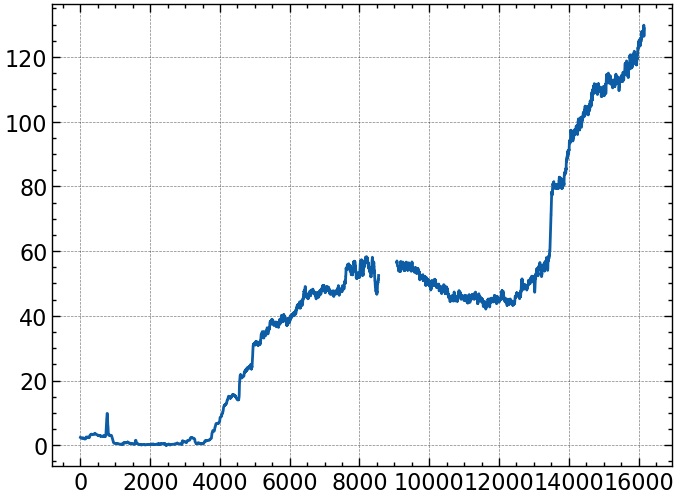

In [24]:
#SWE.loc[:,["pressure","temp","SWE"]].plot()
#swe_hourly.loc[:,"SWE"].plot()
plt.plot(swe_temp_pressure_hourly["SWE_cum"].values)

In [25]:
swe_temp_pressure_daily=swe_temp_pressure_hourly.resample("d").mean()

In [26]:
swe_temp_pressure_hourly.tail()

,SWE_cum,temp,pressure
Date,,,
2021-09-16 05:00:00,127.297275,266.808875,532.550441
2021-09-16 06:00:00,126.421271,267.483875,532.750440
2021-09-16 07:00:00,127.297275,267.500875,533.150440
2021-09-16 08:00:00,128.177070,267.775375,533.200440
2021-09-16 09:00:00,128.739313,269.865875,533.500436


In [27]:
swe_temp_pressure_daily.dtypes

SWE_cum     float64
temp        float64
pressure    float64
dtype: object

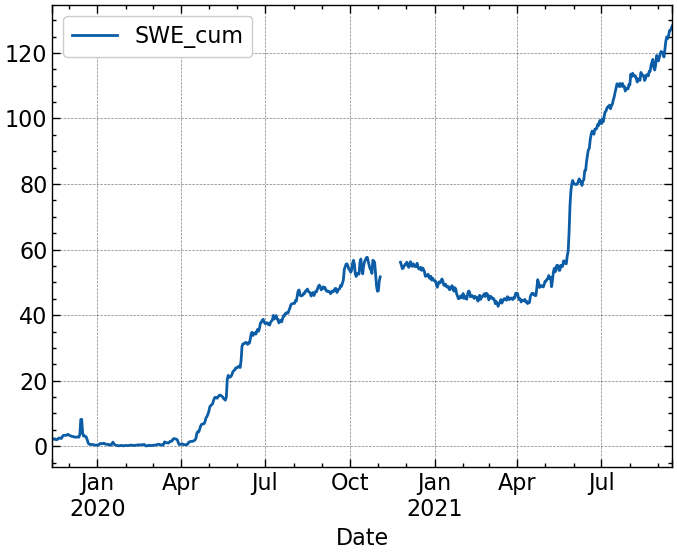

In [28]:
swe_temp_pressure_daily.loc[:,["SWE_cum"]].plot()
plt.legend(loc="upper left",)

In [29]:
count.set_index("Date",inplace=True)
#count=count.fillna(-99999)
count.tail()

,Tair,RH,wind,Direction,SWin,SWout,LWin,LWout,Abl/Acc,Patm
Date,,,,,,,,,,
2022-08-26 17:00:00,1.609,87.6,0.027,271.7,184.46,105.29,312.25,NaN,NaN,532.1
2022-08-26 17:30:00,1.071,90.6,0.165,271.8,217.74,128.69,315.56,NaN,NaN,532
2022-08-26 18:00:00,0.545,94.6,0.057,271.5,57.238,38.724,309.77,NaN,NaN,532.3
2022-08-26 18:30:00,0.156,95.3,0.046,271.6,8.6588,7.2508,307.23,NaN,NaN,532.3
2022-08-26 19:00:00,-0.145,97.6,0.013,271.6,0,0,306.11,NaN,NaN,532.7


In [30]:
data_final=count.loc["2019-11-13 02:00":"2021-11-18 12:30"]



In [31]:
data_final.head(n=10)


,Tair,RH,wind,Direction,SWin,SWout,LWin,LWout,Abl/Acc,Patm
Date,,,,,,,,,,
2019-11-13 02:00:00.125,-6.798,11.37,4.021,121.8,0,0,146.5,184.85,1.63,532.1
2019-11-13 02:30:00.130,-6.337,13.1,3.669,298.1,0,0,152.57,194.61,1.634,532
2019-11-13 03:00:00.135,-6.549,14.14,4.337,326.3,0,0,154.13,182.89,1.638,532
2019-11-13 03:30:00.140,-6.903,15.95,3.087,134,0,0,155.64,200.28,1.631,531.7
2019-11-13 04:00:00.145,-6.642,17.34,3.014,288.5,0,0,156.33,193.47,1.629,531.8
2019-11-13 04:30:00.150,-6.527,17.5,3.722,201.1,0,0,157.14,198.96,1.631,531.7
2019-11-13 05:00:00.155,-7.152,19.22,3.003,344.5,0,0,156.33,201.29,1.63,532
2019-11-13 05:30:00.160,-6.412,18.64,3.244,2.199,0,0,158.7,187.19,1.63,532
2019-11-13 06:00:00.165,-6.374,19.67,4.255,310.2,0,0,159.08,194.5,1.629,532.3


In [32]:
data_final.index = data_final.index.floor('min')
data_final

,Tair,RH,wind,Direction,SWin,SWout,LWin,LWout,Abl/Acc,Patm
Date,,,,,,,,,,
2019-11-13 02:00:00,-6.798,11.37,4.021,121.8,0,0,146.5,184.85,1.63,532.1
2019-11-13 02:30:00,-6.337,13.1,3.669,298.1,0,0,152.57,194.61,1.634,532
2019-11-13 03:00:00,-6.549,14.14,4.337,326.3,0,0,154.13,182.89,1.638,532
2019-11-13 03:30:00,-6.903,15.95,3.087,134,0,0,155.64,200.28,1.631,531.7
2019-11-13 04:00:00,-6.642,17.34,3.014,288.5,0,0,156.33,193.47,1.629,531.8
...,...,...,...,...,...,...,...,...,...,...
2021-11-18 10:30:00,-4.06,24.2,5.834,331.8,748.25,557.61,198.85,NaN,1.369,530.5
2021-11-18 11:00:00,-4.026,25.88,5.564,263.9,779.56,586.37,198.29,NaN,1.369,530.5
2021-11-18 11:30:00,-3.964,25.6,7.269,33.62,834.27,636.64,204.51,NaN,1.368,530.4


In [33]:
data_final.drop(["Patm"],axis=1,inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18196\519624051.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final.drop(["Patm"],axis=1,inplace=True)


In [34]:
data_final.describe().transpose()

,count,unique,top,freq
Tair,26843,9411,-10.44,35
RH,26844,7027,100,2139
wind,26670,7362,0,450
Direction,26846,6427,354.5,66
SWin,26828,12826,0,13158
SWout,26828,12827,0,13164
LWin,26841,14640,315.64,50
LWout,10104,7474,201.62,6
Abl/Acc,16809,1265,1.497,82


In [35]:
data_final.dtypes

Tair         object
RH           object
wind         object
Direction    object
SWin         object
SWout        object
LWin         object
LWout        object
Abl/Acc      object
dtype: object

In [36]:
#print(count['Date'].dtype)
#count['Date'] = pd.to_datetime(count['Date'])
#count['Date'] = count['Date'].dt.strftime('%Y-%m-%d %H:%M:%S')
#start_date="2019-11-01 12:00:00"
#end_date="2021-09-30 12:00:00"
#count['Date'] = pd.to_datetime(count['Date'])
#start_date = pd.to_datetime(start_date)
#end_date = pd.to_datetime(end_date)
#final_count = count[(count['Date'] >= start_date) & (count['Date'] <= end_date)]

#final_count=count.loc[(count['Date']>= '2019/11/01 00:00:00') & (count['Date']<= '2021/09/30 00:00:00')]
#count.reset_index(drop=True,inplace=True)
#final_count.tail(200)

In [37]:
for col in data_final.columns:
    if data_final[col].dtype == 'object':
        data_final[col]=pd.to_numeric(data_final[col], errors='coerce')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18196\242041140.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final[col]=pd.to_numeric(data_final[col], errors='coerce')


In [38]:
data_final.dtypes

Tair         float64
RH           float64
wind         float64
Direction    float64
SWin         float64
SWout        float64
LWin         float64
LWout        float64
Abl/Acc      float64
dtype: object

In [39]:
#date_series=pd.date_range(start='2017-11-10 12:00:00', end='2022-08-26 19:00:00', freq='30min')
#date_series
                          

In [40]:
data_final.resample('H').mean()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18196\2473588260.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data_final.resample('H').mean()


,Tair,RH,wind,Direction,SWin,SWout,LWin,LWout,Abl/Acc
Date,,,,,,,,,
2019-11-13 02:00:00,-6.5675,12.235,3.8450,209.9500,0.0000,0.00000,149.535,189.730,1.6320
2019-11-13 03:00:00,-6.7260,15.045,3.7120,230.1500,0.0000,0.00000,154.885,191.585,1.6345
2019-11-13 04:00:00,-6.5845,17.420,3.3680,244.8000,0.0000,0.00000,156.735,196.215,1.6300
2019-11-13 05:00:00,-6.7820,18.930,3.1235,173.3495,0.0000,0.00000,157.515,194.240,1.6300
2019-11-13 06:00:00,-6.1885,19.510,4.1610,330.0500,3.3311,3.16455,159.305,189.540,1.6280
...,...,...,...,...,...,...,...,...,...
2021-11-18 08:00:00,-4.6025,14.385,7.7825,187.5750,354.0500,234.25500,184.630,NaN,1.3710
2021-11-18 09:00:00,-4.3005,20.570,7.3580,351.6500,538.9100,383.62500,186.715,NaN,1.3700
2021-11-18 10:00:00,-4.0365,23.225,5.9010,196.1750,708.1950,524.26500,195.800,NaN,1.3685


In [41]:
#count=count_raw.reindex(date_series, fill_value=np.nan).interpolate()

In [42]:
data_final.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Tair,26843.0,-7.340301,6.302534,-26.120,-12.070,-8.06000,-1.78500,14.540
RH,26844.0,54.608126,33.562994,3.784,20.020,55.20500,86.70000,100.000
wind,26670.0,3.260875,2.285308,0.000,1.631,2.68600,4.44875,14.470
Direction,26846.0,201.895147,106.389452,-1.981,115.025,222.60000,295.00000,354.600
SWin,26828.0,258.703748,345.494126,0.000,0.000,9.81135,520.50500,1376.800
SWout,26828.0,186.813346,251.035519,0.000,0.000,8.61260,379.59000,1052.700
LWin,26841.0,211.284082,72.908083,88.367,143.780,195.32000,286.63000,368.590
LWout,10104.0,234.815472,56.185783,138.420,190.910,214.15000,278.70500,395.960
Abl/Acc,16809.0,1.293337,0.343173,0.422,1.027,1.42500,1.54500,1.801


In [43]:
data_final.isna().sum()

Tair          8507
RH            8506
wind          8680
Direction     8504
SWin          8522
SWout         8522
LWin          8509
LWout        25246
Abl/Acc      18541
dtype: int64

In [44]:

#data_final.drop(["Date"], axis=1, inplace=True)
data_final.columns

Index(['Tair', 'RH', 'wind', 'Direction', 'SWin', 'SWout ', 'LWin', 'LWout',
       'Abl/Acc'],
      dtype='object')

In [45]:
for col in data_final.columns:
    missing_values = len(data_final.index) - data_final[col].count()
    percentage_missing = ((missing_values / len(data_final.index)) * 100)
    rounded_percentage_missing = math.ceil(percentage_missing)
    print(col, missing_values, rounded_percentage_missing)


Tair 8507 25
RH 8506 25
wind 8680 25
Direction 8504 25
SWin 8522 25
SWout  8522 25
LWin 8509 25
LWout 25246 72
Abl/Acc 18541 53


In [46]:
#sns.pairplot(data_final)

In [47]:
khare_ppt.set_index(["Date"])
khare_ppt=khare_ppt.sort_index()


In [48]:
#khare_ppt = khare_ppt.sort_index()
khare_ppt


,Date,Precipitation
0,2016-12-01 01:00:00,0.0
1,2016-12-01 02:00:00,0.0
2,2016-12-01 03:00:00,0.0
3,2016-12-01 04:00:00,0.0
4,2016-12-01 05:00:00,0.0
...,...,...
52579,2022-11-30 20:00:00,0.0
52580,2022-11-30 21:00:00,0.0
52581,2022-11-30 22:00:00,0.0
52582,2022-11-30 23:00:00,0.0


In [49]:
start_date="2019-11-13 02:00:00"
end_date="2021-11-18 12:30:00"
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)
final_khare = khare_ppt[(khare_ppt['Date'] >= start_date) & (khare_ppt['Date'] <= end_date)]

In [50]:
#khare_ppt=khare_ppt.loc["2019-11-13 02:00":"2021-09-16 09:00"]

In [51]:
final_khare.tail()

,Date,Precipitation
43519,2021-11-18 08:00:00,0.0
43520,2021-11-18 09:00:00,0.0
43521,2021-11-18 10:00:00,0.0
43522,2021-11-18 11:00:00,0.0
43523,2021-11-18 12:00:00,0.0


In [52]:
# First merge
merge1 = pd.merge(swe_temp_pressure_hourly, final_khare, on="Date", how='right')




In [53]:
merge1.tail()

,Date,SWE_cum,temp,pressure,Precipitation
17670,2021-11-18 08:00:00,NaN,NaN,NaN,0.0
17671,2021-11-18 09:00:00,NaN,NaN,NaN,0.0
17672,2021-11-18 10:00:00,NaN,NaN,NaN,0.0
17673,2021-11-18 11:00:00,NaN,NaN,NaN,0.0
17674,2021-11-18 12:00:00,NaN,NaN,NaN,0.0


In [54]:
# Second merge
all_station = pd.merge(merge1,data_final, on="Date", how='right')

In [55]:
for col in all_station.columns:
    if col=="Precipitation":
        all_station["prep_cum"]=np.cumsum(all_station["Precipitation"],axis=0)
        if "Abl/Acc" in all_station.columns:
            all_station.drop(columns=["Abl/Acc"],inplace=True)
            if "temp" in all_station.columns:
                all_station["temp"]=all_station["temp"]-273.15
                if "SWE_cum" in all_station.columns:
                    all_station["SWE_cum"]=all_station["SWE_cum"]*10


In [56]:
all_station['Date']=pd.to_datetime(all_station['Date'])
all_station.set_index("Date",inplace=True)

In [57]:
all_station_daily=all_station.resample("D").mean()

In [58]:
#all_station['Year']=all_station['Date'].dt.year
#all_station['Month']=all_station['Date'].dt.month
#all_station['Day']=all_station['Date'].dt.day

In [59]:
#Season={1:'Winter',2:'Winter',3:'Pre-monsoon',4:'Pre-monsoon',5:'Pre-monsoon', 6:'Monsoon',7:'Monsoon',8:'Monsoon',9:'Monsoon',10:'Post-monsoon',11:'Post-monsoon',12:'Winter'}

In [60]:
#all_station['Season']=all_station['Month'].apply(lambda x:Season[x])

In [61]:
all_station_daily.head()

,SWE_cum,temp,pressure,Precipitation,Tair,RH,wind,Direction,SWin,SWout,LWin,LWout,prep_cum
Date,,,,,,,,,,,,,
2019-11-13,23.790116,-3.304943,533.936800,0.0,-5.160318,20.403182,2.627273,192.354386,267.610209,164.389025,167.086364,215.302093,0.0
2019-11-14,21.639506,-4.265375,534.112939,0.0,-6.486750,14.730625,2.733938,238.164417,240.433565,148.336013,159.437292,220.224167,0.0
2019-11-15,22.268263,-4.981875,532.787939,0.0,-6.712000,23.286875,3.143771,233.030417,244.414667,149.141354,163.107917,219.846667,0.0
2019-11-16,22.598098,-5.431625,531.998355,0.0,-6.989979,35.799583,4.093813,198.149375,227.841750,142.004625,174.046250,233.689375,0.0
2019-11-17,20.160161,-5.860812,530.279605,0.0,-7.865229,24.822292,3.805771,224.918667,243.920813,147.141479,149.791875,208.569583,0.0


In [62]:
all_station_daily.columns

Index(['SWE_cum', 'temp', 'pressure', 'Precipitation', 'Tair', 'RH', 'wind',
       'Direction', 'SWin', 'SWout ', 'LWin', 'LWout', 'prep_cum'],
      dtype='object')

In [63]:
all_station_daily=all_station_daily[['SWE_cum','prep_cum', 'Tair', 'pressure', 'Precipitation', 'RH', 'wind','Direction', 'SWin', 'SWout ', 'LWin', 'LWout']]

In [64]:
#all_station_daily = all_station[['SWE', 'temp', 'pressure', 'Precipitation', 'RH ', 'wind', 'Direction', 'SWin', 'SWout','LWin','LWout','Abl/Acc']].resample('D').mean()
all_station_daily.head()

,SWE_cum,prep_cum,Tair,pressure,Precipitation,RH,wind,Direction,SWin,SWout,LWin,LWout
Date,,,,,,,,,,,,
2019-11-13,23.790116,0.0,-5.160318,533.936800,0.0,20.403182,2.627273,192.354386,267.610209,164.389025,167.086364,215.302093
2019-11-14,21.639506,0.0,-6.486750,534.112939,0.0,14.730625,2.733938,238.164417,240.433565,148.336013,159.437292,220.224167
2019-11-15,22.268263,0.0,-6.712000,532.787939,0.0,23.286875,3.143771,233.030417,244.414667,149.141354,163.107917,219.846667
2019-11-16,22.598098,0.0,-6.989979,531.998355,0.0,35.799583,4.093813,198.149375,227.841750,142.004625,174.046250,233.689375
2019-11-17,20.160161,0.0,-7.865229,530.279605,0.0,24.822292,3.805771,224.918667,243.920813,147.141479,149.791875,208.569583


In [65]:
all_station_daily.to_csv("C:\\Users\\Lenovo\\Desktop\\TC_brief\\daily_data.csv",index=True)

In [66]:
data={'Date':["2019/11/13","2020/11/24","2021/11/18"],'SWE':[20,533,1357]}
observation_df=pd.DataFrame(data)

In [67]:
observation_df['Date']=pd.to_datetime(observation_df['Date'])

In [68]:
observation_df.dtypes

Date    datetime64[ns]
SWE              int64
dtype: object

In [69]:
for col in all_station_daily.columns:
    missing_values = len(all_station_daily.index) - all_station_daily[col].count()
    percentage_missing = ((missing_values / len(all_station_daily.index)) * 100)
    rounded_percentage_missing = math.floor(percentage_missing)
    print(col, missing_values, rounded_percentage_missing)


SWE_cum 85 11
prep_cum 1 0
Tair 172 23
pressure 64 8
Precipitation 1 0
RH 172 23
wind 171 23
Direction 171 23
SWin 171 23
SWout  171 23
LWin 171 23
LWout 525 71


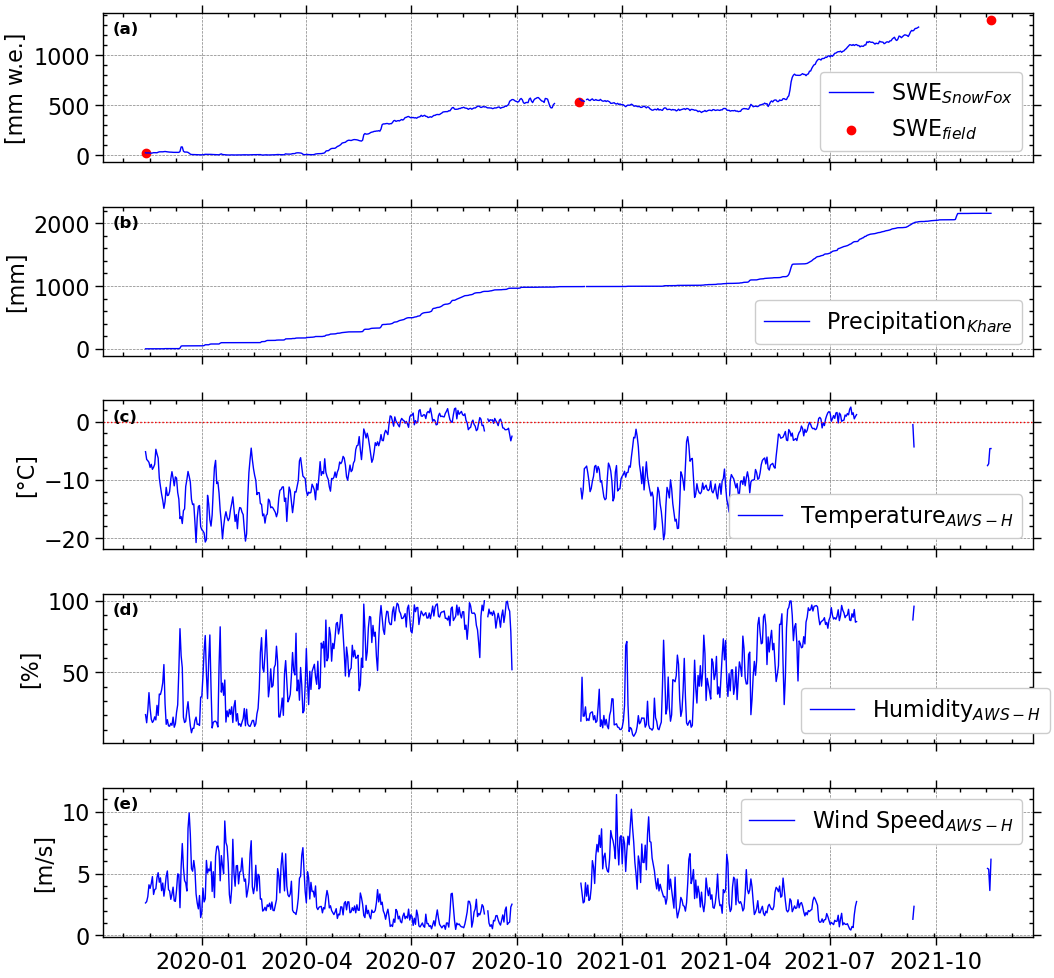

In [70]:
from matplotlib.ticker import MaxNLocator, AutoMinorLocator, MultipleLocator
import string

fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(12, 12), sharex=True, sharey=False)

# Adjust the space between subplots
plt.subplots_adjust(hspace=0.3, wspace=0.3)

columns = [col for col in all_station_daily.columns if col not in ['Date', 'Precipitation', 'Direction', 'SWin', 'SWout', 'LWin', 'LWout', 'pressure','temp']]
# List of y-labels
y_labels = ['[mm w.e.]', '[mm]', '[\u00b0C]', '[%]', '[m/s]']
# List of labels
labels = ['Khare', 'Precipitation$_{Khare}$', 'Temperature$_{AWS-H}$', 'Humidity$_{AWS-H}$', 'Wind Speed$_{AWS-H}$']

for i in range(5):
    if i < len(columns):  # Check if the index is within the range of columns
        ax[i].plot(all_station_daily[columns[i]], color='blue', linewidth=1, linestyle="-",label="SWE$_{SnowFox}$" if i==0 else labels[i])
        # Add a scatter point to the first subplot (index 0)
        if i == 0:
            # Assuming observation_df has a column named 'PointColumn' for the point data
            ax[i].scatter(observation_df['Date'], observation_df['SWE'], color='red', marker='o', label="SWE$_{field}$")
            ax[i].legend(loc=4)
        else:
            # If it's the last subplot, place the legend at the top right corner
            if i == 4:
                ax[i].legend(loc=1)    
            else:
                ax[i].legend(loc=4)  # Add legend to other subplots at the bottom right corner
        
        ax[i].set_xlabel('')  # remove x-axis label
        ax[i].set_ylabel(y_labels[i])  # set y-axis label from the list
        ax[i].tick_params(direction='out', length=6, width=1, grid_alpha=0.5)
        ax[i].grid(True)  # add grid
        ax[i].text(0.01, 0.86, f"({string.ascii_lowercase[i]})", transform=ax[i].transAxes, fontsize=12, fontweight='bold')
        
        # Add a horizontal line at y=0
        if i == 2:  
            ax[i].axhline(0, color='red', linewidth=1, linestyle='dotted')
        if i==3:
            ax[i].legend(loc=(0.75,0.07)) 

#fig.text(0.5, 0.04, 'Date', ha='center', va='center', fontsize=15)
# Save the figure before calling plt.show()
plt.savefig(r'C:\\Users\\Lenovo\\Desktop\\TC_brief\\output\\time_series.png', dpi=400, facecolor='w', bbox_inches="tight")
plt.show()  # Display the plot


In [71]:
dir=data_final["Direction"]

In [72]:
dir.head().dropna().to_frame()

,Direction
Date,
2019-11-13 02:00:00,121.8
2019-11-13 02:30:00,298.1
2019-11-13 03:00:00,326.3
2019-11-13 03:30:00,134.0
2019-11-13 04:00:00,288.5


In [ ]:
speed=data_final["wind"]
speed.head().dropna().to_frame()


In [ ]:
win_data=pd.merge(speed,dir,how="outer",on="Date")
win_data

In [ ]:
win_data.describe()

In [ ]:
import matplotlib.pyplot as plt
#%pip install windrose
from windrose import WindroseAxes

ws = win_data['wind']  # wind speeds
wd = win_data['Direction']  # wind directions

ax = WindroseAxes.from_ax()
ax.bar(wd, ws, normed=True, opening=0.8, edgecolor='white',bins=6)
legend=ax.set_legend(bbox_to_anchor=(0.94,0.90))
legend.set_title("Wind Speed")
ax.set_title("Wind Distribution",color="red",size=16,loc="center")


plt.show()


In [ ]:
#To summarize the meteorological condtion during the accumulation and ablation days
all_station_daily.tail()

In [ ]:
for  col in all_station_daily.columns:
    if col=="SWE_cum":
        all_station_daily['daily_SWE']=all_station_daily["SWE_cum"].diff(periods=1)

In [ ]:
all_station_daily["daily_SWE"].iloc[0]=0
all_station_daily.head()

In [ ]:

#selecting only few columns for reference
reference_data=all_station_daily[['temp', 'RH','wind']]
reference_data=reference_data.add_prefix('reference_')
#Filtering postive SWE value and selecting only few columns
accum_data = all_station_daily[all_station_daily["daily_SWE"] > 0][['temp', 'RH','wind']]
# Renaming the column name with adding accumulation_
accum_data = accum_data.add_prefix('accumulation_')

#Filtering negative SWE value and selecting only few columns 
abb_data=all_station_daily[all_station_daily["daily_SWE"] < 0][['temp', 'RH','wind']]
abb_data=abb_data.add_prefix("ablation_")

In [ ]:
reff_accum_df=reference_data.merge(accum_data,how='outer',on='Date')

In [ ]:
ref_acc_abl_df=reff_accum_df.merge(abb_data,how='outer',on="Date")

In [ ]:
ref_acc_abl_df.head()

In [ ]:
df_melt=ref_acc_abl_df.melt(var_name='variable', value_name='value')

In [ ]:
df_melt['group'] = df_melt['variable'].str.extract(r'_(\w+)$')
df_melt.head(n=2)

In [ ]:
variables=df_melt['variable'].unique()
groups=df_melt['group'].unique()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from matplotlib import rcParams
# Create a subplot for each group
fig, axs = plt.subplots(ncols=3, figsize=(15,12),sharex=False)

# Define a list of colors for the boxplots
colors = ['blue', 'green', 'red']  # Add more colors if you have more than three variables
y_labels = ['Temperature [\u00b0C]','Relative humidity [%]','Wind [m/s]']
legend_labels = ['Reference', 'Accumulation', 'Ablation']

for i, (ax, group) in enumerate(zip(axs, groups)):
    # Filter the dataframe for the current group
    df_group = df_melt[df_melt['group'] == group]
    
    # Create a boxplot for each variable within the current group
    sns.boxplot(x='variable', y='value', hue='variable', data=df_group, ax=ax, palette=colors, fill=False)
    
    # Set the y-label for each column
    ax.set_ylabel(y_labels[i],fontweight='bold',fontsize="16")
    ax.set_xlabel('')
    ax.set_xticklabels([])
    ax.axhline(0, color=".3", dashes=(2, 2))
    ax.tick_params(axis='both', direction='in', length=6, width=1,bottom=True, top=True, left=True, right=True)
    
    # Add grid
    ax.grid(False)

# Create legend patches
legend_patches = [mpatches.Patch(color=color, label=label) for color, label in zip(colors, legend_labels)]

# Add the legend to the figure
fig.legend(handles=legend_patches, loc='lower center', bbox_to_anchor=(0.5, 1.0), ncol=3,fontsize=16)

# Adjust the subplots to make room for the legend
plt.subplots_adjust(top=0.85)
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

# Display the plot
plt.tight_layout()
plt.savefig(r'C:\Users\Lenovo\Desktop\TC_brief\output\outputsample.png', dpi=400, facecolor='w', bbox_inches="tight")
plt.show()

In [ ]:
#selecting only few columns for reference
reference_data_wind=all_station_daily[['wind','Direction']]
reference_data_wind=reference_data_wind.add_prefix('reference_')
#Filtering postive SWE value and selecting only few columns
accum_data_wind = all_station_daily[all_station_daily["daily_SWE"] > 0][['wind','Direction']]
# Renaming the column name with adding accumulation_
accum_data_wind = accum_data_wind.add_prefix('accumulation_')

#Filtering negative SWE value and selecting only few columns 
abb_data_wind=all_station_daily[all_station_daily["daily_SWE"] < 0][['wind','Direction']]
abb_data_wind=abb_data.add_prefix("ablation_")

In [ ]:
reff_accum_df_wind=reference_data_wind.merge(accum_data_wind,how='outer',on='Date')

In [ ]:
ref_acc_abl_df_wind=reff_accum_df_wind.merge(abb_data_wind,how='outer',on="Date")

In [ ]:
ref_acc_abl_df_wind.columns

In [ ]:

# Assuming df is your DataFrame
ref_acc_abl_df_wind = ref_acc_abl_df_wind.reset_index()

# Create a list of your wind and direction columns
wind_cols = ['reference_wind', 'accumulation_wind', 'ablation_wind']
direction_cols = ['reference_Direction', 'accumulation_Direction', 'ablation_Direction']

# Melt your DataFrame separately for wind and direction
wind_df = pd.melt(ref_acc_abl_df_wind, value_vars=wind_cols, var_name='Category', value_name='Wind')
direction_df = pd.melt(ref_acc_abl_df_wind, value_vars=direction_cols, var_name='Category', value_name='Direction')

# Remove the '_wind' and '_Direction' from the 'Category' columns
wind_df['Category'] = wind_df['Category'].str.replace('_wind', '')
direction_df['Category'] = direction_df['Category'].str.replace('_Direction', '')

# Merge the two DataFrames on 'index' and 'Category'
final_df = pd.merge(wind_df, direction_df,  how='left', left_on=['Category'], right_on = ['Category'])

# Now, final_df has your desired format


In [ ]:
final_df

In [ ]:
import matplotlib.pyplot as plt
from windrose import WindroseAxes

# Assuming final_df is your DataFrame
def plot_wind_rose(df, category):
    ax = WindroseAxes.from_ax()
    ax.bar(df[df['Category'] == category]['Direction'], df[df['Category'] == category]['Wind'], normed=True, opening=0.8, edgecolor='white')
    ax.set_legend(loc='best')
    plt.title(category)

# Plot for each category
plot_wind_rose(final_df, 'reference')
plot_wind_rose(final_df, 'accumulation')
plot_wind_rose(final_df, 'ablation')
